# **Group Project** 
### *Welcome to the COMP 258 Project - Neural Networks Project - Full Stack Application to predict first-year Persistence​*

#### *Relevant Information:*
- College: Centennial College
- Program: Software Engineering Technology - Artificial Intelligence
- Term: Winter 2023
- Course: Neural Networks (SEC. 001) - COMP258001_2023W

### **Group AC/DC**

#### *Group Members*

- Pereira Barbosa, Ana​
- Mina Trujillo, Joan​
- Radmy, Mahpara Rafia​
- Sidhu, Manipal​
- Saenz Huerta, Ronald​
- Massa Rebolledo, Stella

#### *Group Project*

You are supposed to use Neural Networks and build a full-stack intelligent solution for any of the following problems:
-	student success in the program (program completion)
-	Persistence (1st year persistence)
-	Academic performance (intake GPA)
-	Other outcomes that you may discover in the dataset

Purpose:
The purpose of this project is to:
- Design and code full-stack intelligent apps using emerging frameworks
- Build a Rest or Graph QL API 
- Build a Front-End for the Rest/Graph QL API 
- Apply appropriate design patterns and principles
- Use Neural Networks to make intelligent use of data

### **A. Import Libraries**

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Normalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

from scipy import stats
import pandas as pd
import numpy as np

import pathlib
import pprint
import tempfile


### **B. Data Processing**

Open the file using Pandas Dataframe to get the column names

In [ ]:
colum_names = pd.read_csv('https://raw.githubusercontent.com/ronaldsaenz88/COMP-258-group-ACDC/master/nn-model/Student%20data.csv', nrows=18).transpose().head(1)
colum_names

0                        1   \
Student Data  Independent variables  First Term Gpa' numeric   

                                    2                        3   \
Student Data  Second Term Gpa' numeric  First Language' numeric   

                            4               5                  6   \
Student Data   Funding numeric  School numeric  FastTrack numeric   

                        7                   8               9   \
Student Data  Coop numeric   Residency numeric  Gender numeric   

                                       10                  11  \
Student Data  Previous Education' numeric  Age Group' numeric   

                                             12                   13  \
Student Data  High School Average Mark' numeric  Math Score' numeric   

                                  14   15                  16  \
Student Data  English Grade' numeric  NaN  Dependent variable   

                                      17  
Student Data  FirstYearPersistence {1,0}

Clean the column names

In [ ]:
colum_names=colum_names.drop(columns=[0,15,16])
colum_names=colum_names.squeeze()
colum_names=colum_names.str.replace('numeric', '', regex=True)
colum_names=colum_names.str.replace('\'', '', regex=True)
colum_names=colum_names.str.replace(' ', '', regex=True)
colum_names=colum_names.str.replace('\{1,0\}', '', regex=True)
colum_names = list(colum_names)
colum_names

['FirstTermGpa',
 'SecondTermGpa',
 'FirstLanguage',
 'Funding',
 'School',
 'FastTrack',
 'Coop',
 'Residency',
 'Gender',
 'PreviousEducation',
 'AgeGroup',
 'HighSchoolAverageMark',
 'MathScore',
 'EnglishGrade',
 'FirstYearPersistence']

Define class names

In [ ]:
# Class Names
class_names = ['FirstTermGpa', 'SecondTermGpa', 'FirstLanguage', 'Funding', 'School', 'FastTrack', 'Coop', 'Residency', 'Gender', 'PreviousEducation', 'AgeGroup', 'HighSchoolAverageMark', 'MathScore', 'EnglishGrade', 'FirstYearPersistence']
class_names_categorical = ['FirstLanguage', 'Funding', 'School', 'FastTrack', 'Coop', 'Residency', 'Gender', 'PreviousEducation', 'AgeGroup']
class_names_numerical = ['FirstTermGpa', 'SecondTermGpa', 'HighSchoolAverageMark', 'MathScore', 'EnglishGrade']
label_dict = {'FirstYearPersistence_no': 0, 'FirstYearPersistence_yes': 1}

Load the data using pandas dataframe

In [ ]:
students_ds = pd.read_csv('https://raw.githubusercontent.com/ronaldsaenz88/COMP-258-group-ACDC/master/nn-model/Student%20data.csv',skiprows=24, names=colum_names)
students_ds = students_ds.replace('?', np.nan)
students_ds

FirstTermGpa SecondTermGpa FirstLanguage  Funding  School  FastTrack  \
0               0             0             1        2       6          2   
1             2.5             2             3        4       6          1   
2            4.25      3.923077             1        1       6          2   
3        3.020833      2.321429             3        4       6          1   
4           4.275      4.326923             1        2       6          1   
...           ...           ...           ...      ...     ...        ...   
1432     1.413043             0           NaN        4       6          2   
1433         4.36      4.074074             1        2       6          1   
1434     2.020833          2.45             1        2       6          2   
1435     4.021739      4.357143           NaN        4       6          2   
1436     2.133333      3.205882             1        2       6          2   

      Coop  Residency  Gender PreviousEducation AgeGroup  \
0        1          1       2                 1        1   
1        2          2       2                 1        3   
2        1          1       1                 2        3   
3        2          2       2                 2        3   
4        1          1       1                 2        3   
...    ...        ...     ...               ...      ...   
1432     2          2       2                 1        1   
1433     1          1       1                 2        4   
1434     1          1       2                 1        1   
1435     1          2       1                 1        2   
1436     2          1       1                 1        1   

     HighSchoolAverageMark MathScore EnglishGrade  FirstYearPersistence  
0                       59        16            7                     1  
1                      NaN       NaN            7                     1  
2                       92        41            9                     1  
3                      NaN       NaN            8                     1  
4                       97       NaN            9                     1  
...                    ...       ...          ...                   ...  
1432                   NaN        47           10                     0  
1433                   NaN       NaN           10                     1  
1434                    78        18            9                     1  
1435                   NaN        46            8                     1  
1436                    81        27            9                     1  

[1437 rows x 15 columns]

Change the datatype of the dataframe

In [ ]:
students_ds=students_ds.astype('float64')
students_ds.dtypes

FirstTermGpa             float64
SecondTermGpa            float64
FirstLanguage            float64
Funding                  float64
School                   float64
FastTrack                float64
Coop                     float64
Residency                float64
Gender                   float64
PreviousEducation        float64
AgeGroup                 float64
HighSchoolAverageMark    float64
MathScore                float64
EnglishGrade             float64
FirstYearPersistence     float64
dtype: object

Get stats from dataframe (Mean, Mode and Standard Deviation)

In [ ]:
scaler = StandardScaler()
scaler.fit(students_ds)
ds_mean = scaler.mean_
ds_mode = np.array(students_ds.mode())[0]
ds_std = scaler.scale_

In [ ]:
ds_mode


array([ 0.,  0.,  1.,  2.,  6.,  2.,  2.,  1.,  2.,  1.,  3., 78., 48.,
        9.,  1.])

In [ ]:
ds_mean

array([ 2.8460731 ,  2.82017558,  1.91101056,  2.92693111,  6.        ,
        1.74182324,  1.69519833,  1.40640223,  1.77453027,  1.27494766,
        2.63154222, 77.15273775, 32.55794872,  8.03017241,  0.79192763])

In [ ]:
ds_std

array([ 1.17468368,  1.1281897 ,  0.99451711,  1.25722069,  1.        ,
        0.43763172,  0.46032338,  0.49116133,  0.41955324,  0.56760083,
        1.42097101, 12.06405871, 10.70396408,  1.71553349,  0.40592889])

Define Features Columns to use in Tensorflow

In [ ]:
# Define feature columns
feature_columns = [
    tf.feature_column.numeric_column("FirstTermGpa"),
    tf.feature_column.numeric_column("SecondTermGpa"),
    tf.feature_column.categorical_column_with_identity("FirstLanguage", num_buckets=3),
    tf.feature_column.categorical_column_with_identity("Funding", num_buckets=9),
    tf.feature_column.categorical_column_with_identity("School", num_buckets=6),
    tf.feature_column.categorical_column_with_identity("FastTrack", num_buckets=2),
    tf.feature_column.categorical_column_with_identity("Coop", num_buckets=2),
    tf.feature_column.categorical_column_with_identity("Residency", num_buckets=2),
    tf.feature_column.categorical_column_with_identity("Gender", num_buckets=2),
    tf.feature_column.categorical_column_with_identity("PreviousEducation", num_buckets=3),
    tf.feature_column.categorical_column_with_identity("AgeGroup", num_buckets=8),
    tf.feature_column.numeric_column("HighSchoolAverageMark"),
    tf.feature_column.numeric_column("MathScore"),
    tf.feature_column.numeric_column("EnglishGrade")
]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Convert the dataframe to Dataset in Tensor

In [ ]:
tensor = tf.convert_to_tensor(students_ds.values)
ds = tf.data.Dataset.from_tensor_slices(dict(students_ds))
ds

<_TensorSliceDataset element_spec={'FirstTermGpa': TensorSpec(shape=(), dtype=tf.float64, name=None), 'SecondTermGpa': TensorSpec(shape=(), dtype=tf.float64, name=None), 'FirstLanguage': TensorSpec(shape=(), dtype=tf.float64, name=None), 'Funding': TensorSpec(shape=(), dtype=tf.float64, name=None), 'School': TensorSpec(shape=(), dtype=tf.float64, name=None), 'FastTrack': TensorSpec(shape=(), dtype=tf.float64, name=None), 'Coop': TensorSpec(shape=(), dtype=tf.float64, name=None), 'Residency': TensorSpec(shape=(), dtype=tf.float64, name=None), 'Gender': TensorSpec(shape=(), dtype=tf.float64, name=None), 'PreviousEducation': TensorSpec(shape=(), dtype=tf.float64, name=None), 'AgeGroup': TensorSpec(shape=(), dtype=tf.float64, name=None), 'HighSchoolAverageMark': TensorSpec(shape=(), dtype=tf.float64, name=None), 'MathScore': TensorSpec(shape=(), dtype=tf.float64, name=None), 'EnglishGrade': TensorSpec(shape=(), dtype=tf.float64, name=None), 'FirstYearPersistence': TensorSpec(shape=(), dtyp

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

Preprocessing function to replace NaN values with mean/mode

In [ ]:
# Define a function to replace NaN values with the column mean
def preprocess(features):
    for feature_name, feature_value in features.items():
        # Replace NaN values with mean using TensorFlow API
        if feature_name in class_names_numerical:
                mean = ds_mean[colum_names.index(feature_name)] 
                std = ds_std[colum_names.index(feature_name)]
                features[feature_name] = tf.where(tf.math.is_nan(feature_value),mean, feature_value)
                #features[feature_name] = (features[feature_name] - mean) / std

        # Replace NaN values with mode using TensorFlow API
        if feature_name in class_names_categorical:
                mode = ds_mode[colum_names.index(feature_name)]
                features[feature_name] = tf.where(tf.math.is_nan(feature_value),mode, feature_value)

    return features

Apply the preprocessing function into the dataset

In [ ]:
# Apply the transformation function to the dataset
ds = ds.map(preprocess)

Show the new dataset using panda dataframe

In [ ]:
# create a batch of data
batch = next(iter(ds.batch(len(ds))))
# create a pandas dataframe from the numpy array
df = pd.DataFrame(batch, columns=colum_names)
df

FirstTermGpa  SecondTermGpa  FirstLanguage  Funding  School  FastTrack  \
0         0.000000       0.000000            1.0      2.0     6.0        2.0   
1         2.500000       2.000000            3.0      4.0     6.0        1.0   
2         4.250000       3.923077            1.0      1.0     6.0        2.0   
3         3.020833       2.321429            3.0      4.0     6.0        1.0   
4         4.275000       4.326923            1.0      2.0     6.0        1.0   
...            ...            ...            ...      ...     ...        ...   
1432      1.413043       0.000000            1.0      4.0     6.0        2.0   
1433      4.360000       4.074074            1.0      2.0     6.0        1.0   
1434      2.020833       2.450000            1.0      2.0     6.0        2.0   
1435      4.021739       4.357143            1.0      4.0     6.0        2.0   
1436      2.133333       3.205882            1.0      2.0     6.0        2.0   

      Coop  Residency  Gender  PreviousEducation  AgeGroup  \
0      1.0        1.0     2.0                1.0       1.0   
1      2.0        2.0     2.0                1.0       3.0   
2      1.0        1.0     1.0                2.0       3.0   
3      2.0        2.0     2.0                2.0       3.0   
4      1.0        1.0     1.0                2.0       3.0   
...    ...        ...     ...                ...       ...   
1432   2.0        2.0     2.0                1.0       1.0   
1433   1.0        1.0     1.0                2.0       4.0   
1434   1.0        1.0     2.0                1.0       1.0   
1435   1.0        2.0     1.0                1.0       2.0   
1436   2.0        1.0     1.0                1.0       1.0   

      HighSchoolAverageMark  MathScore  EnglishGrade  FirstYearPersistence  
0                 59.000000  16.000000           7.0                   1.0  
1                 77.152738  32.557949           7.0                   1.0  
2                 92.000000  41.000000           9.0                   1.0  
3                 77.152738  32.557949           8.0                   1.0  
4                 97.000000  32.557949           9.0                   1.0  
...                     ...        ...           ...                   ...  
1432              77.152738  47.000000          10.0                   0.0  
1433              77.152738  32.557949          10.0                   1.0  
1434              78.000000  18.000000           9.0                   1.0  
1435              77.152738  46.000000           8.0                   1.0  
1436              81.000000  27.000000           9.0                   1.0  

[1437 rows x 15 columns]

In [ ]:
df['HighSchoolAverageMark'].unique()

array([ 59.        ,  77.15273775,  92.        ,  97.        ,
       101.        ,  68.        ,  79.        ,  98.        ,
        78.        ,  73.        ,  81.        ,  95.        ,
        80.        ,  85.        ,  83.        ,  60.        ,
        76.        ,  87.        ,  82.        ,  74.        ,
        88.        ,  90.        ,  17.        ,  75.        ,
        50.        ,  48.        ,  63.        ,  69.        ,
        72.        ,  86.        ,  77.        ,  67.        ,
        84.        ,  65.        ,  93.        ,  52.        ,
       102.        ,  96.        ,  53.        ,  89.        ,
        61.        ,  45.        ,  54.        ,  66.        ,
        94.        ,  55.        ,  71.        , 104.        ,
        64.        ,  91.        ,  56.        , 105.        ,
        70.        ,  57.        ,  42.        ,  62.        ,
       100.        , 107.        ,  58.        ,  25.        ,
        99.        ,  51.        , 103.        ,  44.  

In [ ]:
df['FirstLanguage'].unique()

array([1., 3., 2.])

Classify the data into X, and Y (Features and Targets)

In [ ]:
# Extract target values according to statement
y = pd.get_dummies(df.iloc[0:, 14])
y = np.array(y)

# Extract features
X = df.iloc[0:, 0:14].values

In [ ]:
X, y

(array([[ 0.        ,  0.        ,  1.        , ..., 59.        ,
         16.        ,  7.        ],
        [ 2.5       ,  2.        ,  3.        , ..., 77.15273775,
         32.55794872,  7.        ],
        [ 4.25      ,  3.923077  ,  1.        , ..., 92.        ,
         41.        ,  9.        ],
        ...,
        [ 2.020833  ,  2.45      ,  1.        , ..., 78.        ,
         18.        ,  9.        ],
        [ 4.021739  ,  4.357143  ,  1.        , ..., 77.15273775,
         46.        ,  8.        ],
        [ 2.133333  ,  3.205882  ,  1.        , ..., 81.        ,
         27.        ,  9.        ]]),
 array([[0, 1],
        [0, 1],
        [0, 1],
        ...,
        [0, 1],
        [0, 1],
        [0, 1]], dtype=uint8))

### **C. SPLITTING DATA**

Splitting the data 

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.2, shuffle = True)

In [ ]:
X_train_full.shape, y_train_full.shape

((1293, 14), (1293, 2))

In [ ]:
X_train.shape, y_train.shape

((1034, 14), (1034, 2))

In [ ]:
X_test.shape, y_test.shape

((144, 14), (144, 2))

In [ ]:
X_val.shape, y_val.shape

((259, 14), (259, 2))

Print the number of features

In [ ]:
n_features = X_train.shape[1]
print(n_features)

14


### **D. TRAINING MODEL**

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Create a Sequential model with some layers:
1. Input Layer with 14 features
2. Normalization Layer
3. Dense Layer with 300 neurons - Activation Relu
4. Dense Layer with 150 neurons - Activation Relu
5. Alpha Dropout Layer
6. Dense Layer with 80 neurons - Activation Relu
7. Dense Layer with 25 neurons - Activation Relu
8. Output Layer with 2 neurons - Activation Softmax

In [ ]:
model = Sequential()

# input layer
model.add(Dense(n_features))

model.add(Normalization(axis=None))

# add the first hidden layer with 300 neurons, relu  activation function
model.add(Dense(300, activation="relu", kernel_initializer='he_normal'))

# add the first hidden layer with 150 neurons, relu  activation function
model.add(Dense(150, activation="relu", kernel_initializer='he_normal'))

model.add(keras.layers.AlphaDropout(rate=0.2))

# add the second hidden layer with 80 neurons, relu  activation function
model.add(Dense(80, activation="relu", kernel_initializer='he_normal'))

# add the second hidden layer with 25 neurons, relu  activation function
model.add(Dense(25, activation="relu", kernel_initializer='he_normal'))

# add the output layer with 2 neurons, erlu activation function
model.add(Dense(2, activation="softmax"))

Model NADAM with Categorical crossentropy for loss function.

In [ ]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)
optimizer = tf.keras.optimizers.Nadam(lr=5e-4)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

EarlyStopping Callback to avoid overfiting. 
It will monitor the val loss function.

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    restore_best_weights=True)

Checkpoint Callback to get the best model in each epoch iteration.

In [ ]:
checkpoint = ModelCheckpoint('save_model_tf/best-model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Fit the Model using:
- 200 Epochs
- 128 Batch Size
- Validation Data 
- Callbacks: Early Stopping and Checkpoint

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data = (X_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/200
9/9 [==============================] - 4s 55ms/step - loss: 3.1514 - accuracy: 0.6944 - val_loss: 0.4716 - val_accuracy: 0.8108
Epoch 2/200
9/9 [==============================] - 0s 13ms/step - loss: 0.9133 - accuracy: 0.6799 - val_loss: 0.6000 - val_accuracy: 0.8263
Epoch 3/200
9/9 [==============================] - 0s 12ms/step - loss: 0.6708 - accuracy: 0.7350 - val_loss: 0.5610 - val_accuracy: 0.8263
Epoch 4/200
9/9 [==============================] - 0s 12ms/step - loss: 0.6023 - accuracy: 0.7631 - val_loss: 0.5199 - val_accuracy: 0.8263
Epoch 5/200
9/9 [==============================] - 0s 10ms/step - loss: 0.5671 - accuracy: 0.7650 - val_loss: 0.5073 - val_accuracy: 0.8263
Epoch 6/200
9/9 [==============================] - 0s 14ms/step - loss: 0.5389 - accuracy: 0.7747 - val_loss: 0.4724 - val_accuracy: 0.8263
Epoch 7/200
9/9 [==============================] - 0s 12ms/step - loss: 0.5285 - accuracy: 0.7785 - val_loss: 0.4754 - val_accuracy: 0.8263
Epoch 8/200
9/9 [===

Print the summary of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 normalization (Normalizatio  (None, 14)               3         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 300)               4500      
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                                 
 alpha_dropout (AlphaDropout  (None, 150)              0         
 )                                                               
                                                                 
 dense_3 (Dense)             (None, 80)                1

### **E. EVALUATION MODEL**

Model Accuracy (training, testing and validation data)

In [ ]:
# Evaluate with training data
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Training Accuracy: %.3f' % acc)

Test Accuracy: 0.865


In [ ]:
# Evaluate with testing data
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.868


In [ ]:
# Evaluate with val data
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print('Validation Accuracy: %.3f' % acc)

Test Accuracy: 0.865


Plots (Loss, Accuracy, Mix)

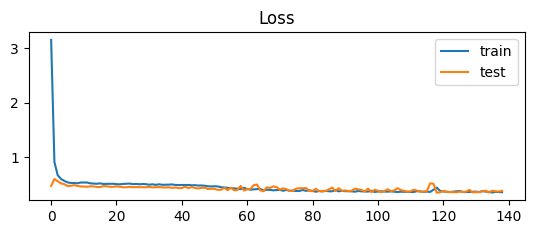

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

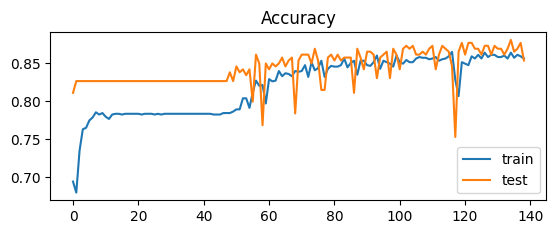

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

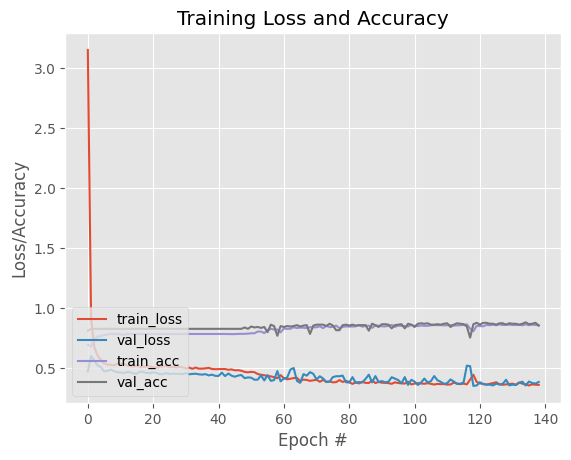

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 139), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 139), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 139), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 139), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

Prediction of model using the test data

In [ ]:
# make predictions on the testing set
predict = model.predict(X_test, batch_size=32)

5/5 [==============================] - 0s 5ms/step


Label the prediction data

In [ ]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predict_labeled = np.argmax(predict, axis=1)

Print the classification report

In [ ]:
# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), predict_labeled, target_names=label_dict))

                          precision    recall  f1-score   support

 FirstYearPersistence_no       1.00      0.37      0.54        30
FirstYearPersistence_yes       0.86      1.00      0.92       114

                accuracy                           0.87       144
               macro avg       0.93      0.68      0.73       144
            weighted avg       0.89      0.87      0.84       144



In [ ]:
'''
0	0	1	2	6	2	1	1	2	1	1	59	16	7	1
2.5	2	3	4	6	1	2	2	2	1	3	NaN	NaN	7	1
4.25	3.923077	1	1	6	2	1	1	1	2	3	92	41	9	1
'''

In [ ]:
X_test[0]

array([ 2.18      ,  1.566667  ,  1.        ,  2.        ,  6.        ,
        2.        ,  2.        ,  1.        ,  2.        ,  1.        ,
        2.        , 65.        , 32.55794872,  9.        ])

Examples to test the prediction using a list

In [ ]:
row = [0, 0, 1, 2, 6, 2, 1, 1, 2, 1, 1, 59, 16, 7]
y_hat = model.predict([row])
print('Predicted: %s (class=%d)' % (y_hat, y_hat.argmax(axis=1)))

1/1 [==============================] - 0s 125ms/step
Predicted: [[0.8130728  0.18692714]] (class=0)


In [ ]:
row = [2.5, 2, 3, 4, 6, 1, 2, 2, 2, 1, 3, 80, 80, 7]
y_hat = model.predict([row])
print('Predicted: %s (class=%d)' % (y_hat, y_hat.argmax(axis=1)))

1/1 [==============================] - 0s 44ms/step
Predicted: [[0.00173666 0.9982633 ]] (class=1)


In [ ]:
row = [4, 3, 1, 1, 6, 2, 1, 1, 1, 2, 3, 92, 41, 9]
y_hat = model.predict([row])
print('Predicted: %s (class=%d)' % (y_hat, y_hat.argmax(axis=1)))

1/1 [==============================] - 0s 40ms/step
Predicted: [[0.07059525 0.92940474]] (class=1)


In [ ]:
row = [1, 1, 3, 4, 6, 2, 2, 2, 2, 2, 0, 92, 41, 9]
y_hat = model.predict([row])
print('Predicted: %s (class=%d)' % (y_hat, y_hat.argmax(axis=1)))

1/1 [==============================] - 0s 42ms/step
Predicted: [[0.3235028 0.6764972]] (class=1)


### **F. SAVE MODEL**

Save the model in h5 format

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_last_model.h5')

Save the data into csv files

In [ ]:
# Save Data
print(X_train, type(X_train))

# Convert the NumPy array to a Pandas DataFrame
X_train_df = pd.DataFrame(X_train)
X_val_df = pd.DataFrame(X_val)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)
y_test_df = pd.DataFrame(y_test)

# Write the data to a CSV file
X_train_df.to_csv('X_train_data_group_acdc.csv',index=False)
X_val_df.to_csv('X_val_data_group_acdc.csv',index=False)
X_test_df.to_csv('X_test_data_group_acdc.csv',index=False)

y_train_df.to_csv('y_train_data_group_acdc.csv',index=False)
y_val_df.to_csv('y_val_data_group_acdc.csv',index=False)
y_test_df.to_csv('y_test_data_group_acdc.csv',index=False)

[[ 2.28        2.42        3.         ... 77.15273775 32.55794872
   8.        ]
 [ 2.8460731   2.82017558  1.         ... 77.15273775 25.
   9.        ]
 [ 2.94        3.25        1.         ... 77.15273775 21.
   9.        ]
 ...
 [ 2.083333    1.763158    1.         ... 77.15273775 32.55794872
   3.        ]
 [ 2.2         1.47619     1.         ... 82.         23.
   7.        ]
 [ 3.020833    2.130435    3.         ... 77.15273775 34.
   8.        ]] <class 'numpy.ndarray'>


Load the model saved to test it

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_last_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 normalization (Normalizatio  (None, 14)               3         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 300)               4500      
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                                 
 alpha_dropout (AlphaDropout  (None, 150)              0         
 )                                                               
                                                                 
 dense_3 (Dense)             (None, 80)                1

Examples to test the prediction with the new model (loaded) using a list

In [ ]:
row = [0, 0, 1, 2, 6, 2, 1, 1, 2, 1, 1, 59, 16, 7]
y_hat = new_model.predict([row])
print('Predicted: %s (class=%d)' % (y_hat, y_hat.argmax(axis=1)))

1/1 [==============================] - 0s 182ms/step
Predicted: [[0.8130728  0.18692714]] (class=0)


In [ ]:
row = [4, 3, 1, 1, 6, 2, 1, 1, 1, 2, 3, 92, 41, 9]
y_hat = new_model.predict([row])
print('Predicted: %s (class=%d)' % (y_hat, y_hat.argmax(axis=1)))

1/1 [==============================] - 0s 162ms/step
Predicted: [[0.07059525 0.92940474]] (class=1)
